In [2]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

np.random.seed(5)

In [4]:
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [12]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# Or use dict comprehension
idx2code = {v: k for k, v in code2idx.items()}

In [15]:
# Whole data also at gist
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [45]:
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

(50, 5)


In [46]:
X_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = max(list(idx2code.keys()))

In [47]:
print("Data: ", X_train)

Data:  [[11  9  2 10]
 [ 9  2 10  8]
 [ 2 10  8  1]
 [10  8  1  7]
 [ 8  1  7  8]
 [ 1  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 11]
 [10 11 11  4]
 [11 11  4 11]
 [11  4 11  9]
 [ 4 11  9  9]
 [11  9  9  9]
 [ 9  9  9 10]
 [ 9  9 10  8]
 [ 9 10  8  1]
 [10  8  1  7]
 [ 8  1  7  9]
 [ 1  7  9 11]
 [ 7  9 11 11]
 [ 9 11 11  9]
 [11 11  9  9]
 [11  9  9  2]
 [ 9  9  2  8]
 [ 9  2  8  8]
 [ 2  8  8  8]
 [ 8  8  8  8]
 [ 8  8  8  8]
 [ 8  8  8  9]
 [ 8  8  9  3]
 [ 8  9  3  9]
 [ 9  3  9  9]
 [ 3  9  9  9]
 [ 9  9  9  9]
 [ 9  9  9  9]
 [ 9  9  9 10]
 [ 9  9 10  4]
 [ 9 10  4 11]
 [10  4 11  9]
 [ 4 11  9  2]
 [11  9  2 10]
 [ 9  2 10  8]
 [ 2 10  8  1]
 [10  8  1  7]
 [ 8  1  7  9]
 [ 1  7  9 11]
 [ 7  9 11 11]
 [ 9 11 11  9]
 [11 11  9  9]]


In [48]:
# Normalize the data
X_train = X_train / float(max_idx_value)

In [49]:
print("Shape :", X_train.shape)
print("Data: ", X_train)

Shape : (50, 4)
Data:  [[ 0.84615385  0.69230769  0.15384615  0.76923077]
 [ 0.69230769  0.15384615  0.76923077  0.61538462]
 [ 0.15384615  0.76923077  0.61538462  0.07692308]
 [ 0.76923077  0.61538462  0.07692308  0.53846154]
 [ 0.61538462  0.07692308  0.53846154  0.61538462]
 [ 0.07692308  0.53846154  0.61538462  0.69230769]
 [ 0.53846154  0.61538462  0.69230769  0.76923077]
 [ 0.61538462  0.69230769  0.76923077  0.84615385]
 [ 0.69230769  0.76923077  0.84615385  0.84615385]
 [ 0.76923077  0.84615385  0.84615385  0.30769231]
 [ 0.84615385  0.84615385  0.30769231  0.84615385]
 [ 0.84615385  0.30769231  0.84615385  0.69230769]
 [ 0.30769231  0.84615385  0.69230769  0.69230769]
 [ 0.84615385  0.69230769  0.69230769  0.69230769]
 [ 0.69230769  0.69230769  0.69230769  0.76923077]
 [ 0.69230769  0.69230769  0.76923077  0.61538462]
 [ 0.69230769  0.76923077  0.61538462  0.07692308]
 [ 0.76923077  0.61538462  0.07692308  0.53846154]
 [ 0.61538462  0.07692308  0.53846154  0.69230769]
 [ 0.076

In [50]:
# Input of RNN (LSTM) should have sample, timestep, features
# We have features as 1, let's reshape it
X_train = np.reshape(X_train, (50, 4, 1))

In [51]:
print(X_train)

[[[ 0.84615385]
  [ 0.69230769]
  [ 0.15384615]
  [ 0.76923077]]

 [[ 0.69230769]
  [ 0.15384615]
  [ 0.76923077]
  [ 0.61538462]]

 [[ 0.15384615]
  [ 0.76923077]
  [ 0.61538462]
  [ 0.07692308]]

 [[ 0.76923077]
  [ 0.61538462]
  [ 0.07692308]
  [ 0.53846154]]

 [[ 0.61538462]
  [ 0.07692308]
  [ 0.53846154]
  [ 0.61538462]]

 [[ 0.07692308]
  [ 0.53846154]
  [ 0.61538462]
  [ 0.69230769]]

 [[ 0.53846154]
  [ 0.61538462]
  [ 0.69230769]
  [ 0.76923077]]

 [[ 0.61538462]
  [ 0.69230769]
  [ 0.76923077]
  [ 0.84615385]]

 [[ 0.69230769]
  [ 0.76923077]
  [ 0.84615385]
  [ 0.84615385]]

 [[ 0.76923077]
  [ 0.84615385]
  [ 0.84615385]
  [ 0.30769231]]

 [[ 0.84615385]
  [ 0.84615385]
  [ 0.30769231]
  [ 0.84615385]]

 [[ 0.84615385]
  [ 0.30769231]
  [ 0.84615385]
  [ 0.69230769]]

 [[ 0.30769231]
  [ 0.84615385]
  [ 0.69230769]
  [ 0.69230769]]

 [[ 0.84615385]
  [ 0.69230769]
  [ 0.69230769]
  [ 0.69230769]]

 [[ 0.69230769]
  [ 0.69230769]
  [ 0.69230769]
  [ 0.76923077]]

 [[ 0.6923

In [52]:
print("Before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("After one-hot encoding: ", y_train.shape)

Before one-hot encoding:  (50,)
After one-hot encoding:  (50, 12)


## Model making

In [55]:
X_train.shape

(50, 4, 1)

In [56]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(one_hot_vec_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [58]:
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [60]:
model.fit(X_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

Epoch 1/2000
 - 1s - loss: 2.4948 - acc: 0.0400
Epoch 2/2000
 - 0s - loss: 2.4553 - acc: 0.1000
Epoch 3/2000
 - 0s - loss: 2.4201 - acc: 0.1800
Epoch 4/2000
 - 0s - loss: 2.3806 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.3369 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.2822 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 2.2134 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 2.1374 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 2.0503 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9868 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.9544 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.9616 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.9477 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.9357 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.9281 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.9194 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.9142 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.9108 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.9048 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.9036 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

 - 0s - loss: 1.5463 - acc: 0.4400
Epoch 168/2000
 - 0s - loss: 1.5470 - acc: 0.4400
Epoch 169/2000
 - 0s - loss: 1.5437 - acc: 0.4400
Epoch 170/2000
 - 0s - loss: 1.5445 - acc: 0.4400
Epoch 171/2000
 - 0s - loss: 1.5416 - acc: 0.4400
Epoch 172/2000
 - 0s - loss: 1.5348 - acc: 0.4200
Epoch 173/2000
 - 0s - loss: 1.5404 - acc: 0.4200
Epoch 174/2000
 - 0s - loss: 1.5276 - acc: 0.4200
Epoch 175/2000
 - 0s - loss: 1.5361 - acc: 0.4400
Epoch 176/2000
 - 0s - loss: 1.5370 - acc: 0.4400
Epoch 177/2000
 - 0s - loss: 1.5297 - acc: 0.4400
Epoch 178/2000
 - 0s - loss: 1.5178 - acc: 0.4200
Epoch 179/2000
 - 0s - loss: 1.5274 - acc: 0.4000
Epoch 180/2000
 - 0s - loss: 1.5287 - acc: 0.4200
Epoch 181/2000
 - 0s - loss: 1.5254 - acc: 0.4600
Epoch 182/2000
 - 0s - loss: 1.5195 - acc: 0.4200
Epoch 183/2000
 - 0s - loss: 1.5260 - acc: 0.4400
Epoch 184/2000
 - 0s - loss: 1.5277 - acc: 0.4400
Epoch 185/2000
 - 0s - loss: 1.5155 - acc: 0.4800
Epoch 186/2000
 - 0s - loss: 1.5036 - acc: 0.4800
Epoch 187/2000


 - 0s - loss: 1.2232 - acc: 0.5000
Epoch 332/2000
 - 0s - loss: 1.2165 - acc: 0.5000
Epoch 333/2000
 - 0s - loss: 1.2143 - acc: 0.5400
Epoch 334/2000
 - 0s - loss: 1.2052 - acc: 0.5400
Epoch 335/2000
 - 0s - loss: 1.2022 - acc: 0.5400
Epoch 336/2000
 - 0s - loss: 1.2034 - acc: 0.5400
Epoch 337/2000
 - 0s - loss: 1.2010 - acc: 0.5200
Epoch 338/2000
 - 0s - loss: 1.2007 - acc: 0.5200
Epoch 339/2000
 - 0s - loss: 1.2041 - acc: 0.5200
Epoch 340/2000
 - 0s - loss: 1.2065 - acc: 0.5400
Epoch 341/2000
 - 0s - loss: 1.2010 - acc: 0.5000
Epoch 342/2000
 - 0s - loss: 1.2004 - acc: 0.4600
Epoch 343/2000
 - 0s - loss: 1.2050 - acc: 0.5000
Epoch 344/2000
 - 0s - loss: 1.2177 - acc: 0.5400
Epoch 345/2000
 - 0s - loss: 1.2052 - acc: 0.5200
Epoch 346/2000
 - 0s - loss: 1.1876 - acc: 0.5200
Epoch 347/2000
 - 0s - loss: 1.1822 - acc: 0.5400
Epoch 348/2000
 - 0s - loss: 1.2006 - acc: 0.5400
Epoch 349/2000
 - 0s - loss: 1.1851 - acc: 0.4800
Epoch 350/2000
 - 0s - loss: 1.2006 - acc: 0.4800
Epoch 351/2000


 - 0s - loss: 0.8911 - acc: 0.6600
Epoch 496/2000
 - 0s - loss: 0.8959 - acc: 0.6400
Epoch 497/2000
 - 0s - loss: 0.8917 - acc: 0.6200
Epoch 498/2000
 - 0s - loss: 0.8924 - acc: 0.6200
Epoch 499/2000
 - 0s - loss: 0.8934 - acc: 0.6400
Epoch 500/2000
 - 0s - loss: 0.8862 - acc: 0.6600
Epoch 501/2000
 - 0s - loss: 0.8988 - acc: 0.6200
Epoch 502/2000
 - 0s - loss: 0.8870 - acc: 0.5800
Epoch 503/2000
 - 0s - loss: 0.8806 - acc: 0.6000
Epoch 504/2000
 - 0s - loss: 0.9065 - acc: 0.6400
Epoch 505/2000
 - 0s - loss: 0.8803 - acc: 0.6400
Epoch 506/2000
 - 0s - loss: 0.8809 - acc: 0.6200
Epoch 507/2000
 - 0s - loss: 0.8782 - acc: 0.6600
Epoch 508/2000
 - 0s - loss: 0.8762 - acc: 0.6800
Epoch 509/2000
 - 0s - loss: 0.8643 - acc: 0.6600
Epoch 510/2000
 - 0s - loss: 0.8729 - acc: 0.6200
Epoch 511/2000
 - 0s - loss: 0.8640 - acc: 0.6200
Epoch 512/2000
 - 0s - loss: 0.8579 - acc: 0.7000
Epoch 513/2000
 - 0s - loss: 0.8557 - acc: 0.7000
Epoch 514/2000
 - 0s - loss: 0.8616 - acc: 0.6400
Epoch 515/2000


 - 0s - loss: 0.6418 - acc: 0.7600
Epoch 660/2000
 - 0s - loss: 0.6533 - acc: 0.7400
Epoch 661/2000
 - 0s - loss: 0.6480 - acc: 0.7600
Epoch 662/2000
 - 0s - loss: 0.6413 - acc: 0.7800
Epoch 663/2000
 - 0s - loss: 0.6591 - acc: 0.8000
Epoch 664/2000
 - 0s - loss: 0.6382 - acc: 0.7600
Epoch 665/2000
 - 0s - loss: 0.6367 - acc: 0.7800
Epoch 666/2000
 - 0s - loss: 0.6222 - acc: 0.7800
Epoch 667/2000
 - 0s - loss: 0.6337 - acc: 0.7400
Epoch 668/2000
 - 0s - loss: 0.6412 - acc: 0.7600
Epoch 669/2000
 - 0s - loss: 0.6210 - acc: 0.8000
Epoch 670/2000
 - 0s - loss: 0.6438 - acc: 0.7200
Epoch 671/2000
 - 0s - loss: 0.6233 - acc: 0.7800
Epoch 672/2000
 - 0s - loss: 0.6286 - acc: 0.7800
Epoch 673/2000
 - 0s - loss: 0.6258 - acc: 0.7400
Epoch 674/2000
 - 0s - loss: 0.6139 - acc: 0.7800
Epoch 675/2000
 - 0s - loss: 0.6465 - acc: 0.7800
Epoch 676/2000
 - 0s - loss: 0.6103 - acc: 0.8600
Epoch 677/2000
 - 0s - loss: 0.6081 - acc: 0.7800
Epoch 678/2000
 - 0s - loss: 0.6201 - acc: 0.8000
Epoch 679/2000


 - 0s - loss: 0.5195 - acc: 0.8000
Epoch 824/2000
 - 0s - loss: 0.4982 - acc: 0.8600
Epoch 825/2000
 - 0s - loss: 0.4991 - acc: 0.8400
Epoch 826/2000
 - 0s - loss: 0.4993 - acc: 0.8200
Epoch 827/2000
 - 0s - loss: 0.4999 - acc: 0.8400
Epoch 828/2000
 - 0s - loss: 0.4937 - acc: 0.8400
Epoch 829/2000
 - 0s - loss: 0.4992 - acc: 0.8400
Epoch 830/2000
 - 0s - loss: 0.5063 - acc: 0.8400
Epoch 831/2000
 - 0s - loss: 0.4919 - acc: 0.8400
Epoch 832/2000
 - 0s - loss: 0.5206 - acc: 0.8200
Epoch 833/2000
 - 0s - loss: 0.5061 - acc: 0.8400
Epoch 834/2000
 - 0s - loss: 0.5117 - acc: 0.8600
Epoch 835/2000
 - 0s - loss: 0.5108 - acc: 0.8200
Epoch 836/2000
 - 0s - loss: 0.4979 - acc: 0.8200
Epoch 837/2000
 - 0s - loss: 0.4836 - acc: 0.8400
Epoch 838/2000
 - 0s - loss: 0.5110 - acc: 0.8200
Epoch 839/2000
 - 0s - loss: 0.4914 - acc: 0.8400
Epoch 840/2000
 - 0s - loss: 0.4991 - acc: 0.8400
Epoch 841/2000
 - 0s - loss: 0.4894 - acc: 0.8600
Epoch 842/2000
 - 0s - loss: 0.4893 - acc: 0.8400
Epoch 843/2000


 - 0s - loss: 0.4276 - acc: 0.8600
Epoch 988/2000
 - 0s - loss: 0.4530 - acc: 0.8400
Epoch 989/2000
 - 0s - loss: 0.4469 - acc: 0.8200
Epoch 990/2000
 - 0s - loss: 0.4266 - acc: 0.8800
Epoch 991/2000
 - 0s - loss: 0.4289 - acc: 0.8200
Epoch 992/2000
 - 0s - loss: 0.4191 - acc: 0.8600
Epoch 993/2000
 - 0s - loss: 0.4357 - acc: 0.8200
Epoch 994/2000
 - 0s - loss: 0.4462 - acc: 0.8800
Epoch 995/2000
 - 0s - loss: 0.4260 - acc: 0.8600
Epoch 996/2000
 - 0s - loss: 0.4504 - acc: 0.8200
Epoch 997/2000
 - 0s - loss: 0.4239 - acc: 0.8600
Epoch 998/2000
 - 0s - loss: 0.4315 - acc: 0.8600
Epoch 999/2000
 - 0s - loss: 0.4278 - acc: 0.8600
Epoch 1000/2000
 - 0s - loss: 0.4267 - acc: 0.8600
Epoch 1001/2000
 - 0s - loss: 0.4210 - acc: 0.8800
Epoch 1002/2000
 - 0s - loss: 0.4204 - acc: 0.8400
Epoch 1003/2000
 - 0s - loss: 0.4256 - acc: 0.8400
Epoch 1004/2000
 - 0s - loss: 0.4156 - acc: 0.8400
Epoch 1005/2000
 - 0s - loss: 0.4240 - acc: 0.8400
Epoch 1006/2000
 - 0s - loss: 0.4373 - acc: 0.8200
Epoch 10

 - 0s - loss: 0.3697 - acc: 0.8600
Epoch 1149/2000
 - 0s - loss: 0.4032 - acc: 0.8600
Epoch 1150/2000
 - 0s - loss: 0.3809 - acc: 0.8600
Epoch 1151/2000
 - 0s - loss: 0.3808 - acc: 0.8600
Epoch 1152/2000
 - 0s - loss: 0.3759 - acc: 0.8600
Epoch 1153/2000
 - 0s - loss: 0.3841 - acc: 0.8600
Epoch 1154/2000
 - 0s - loss: 0.3755 - acc: 0.8600
Epoch 1155/2000
 - 0s - loss: 0.3835 - acc: 0.8600
Epoch 1156/2000
 - 0s - loss: 0.3744 - acc: 0.8800
Epoch 1157/2000
 - 0s - loss: 0.3771 - acc: 0.8800
Epoch 1158/2000
 - 0s - loss: 0.3807 - acc: 0.8600
Epoch 1159/2000
 - 0s - loss: 0.3879 - acc: 0.8400
Epoch 1160/2000
 - 0s - loss: 0.3780 - acc: 0.8800
Epoch 1161/2000
 - 0s - loss: 0.3774 - acc: 0.8600
Epoch 1162/2000
 - 0s - loss: 0.3801 - acc: 0.8800
Epoch 1163/2000
 - 0s - loss: 0.3952 - acc: 0.8600
Epoch 1164/2000
 - 0s - loss: 0.3716 - acc: 0.8600
Epoch 1165/2000
 - 0s - loss: 0.3890 - acc: 0.8600
Epoch 1166/2000
 - 0s - loss: 0.3828 - acc: 0.8600
Epoch 1167/2000
 - 0s - loss: 0.4213 - acc: 0.8

Epoch 1309/2000
 - 0s - loss: 0.3525 - acc: 0.9000
Epoch 1310/2000
 - 0s - loss: 0.3509 - acc: 0.8800
Epoch 1311/2000
 - 0s - loss: 0.3521 - acc: 0.8600
Epoch 1312/2000
 - 0s - loss: 0.3412 - acc: 0.8400
Epoch 1313/2000
 - 0s - loss: 0.3603 - acc: 0.8600
Epoch 1314/2000
 - 0s - loss: 0.3830 - acc: 0.8600
Epoch 1315/2000
 - 0s - loss: 0.3556 - acc: 0.8600
Epoch 1316/2000
 - 0s - loss: 0.3799 - acc: 0.8600
Epoch 1317/2000
 - 0s - loss: 0.3518 - acc: 0.8600
Epoch 1318/2000
 - 0s - loss: 0.3617 - acc: 0.8600
Epoch 1319/2000
 - 0s - loss: 0.3617 - acc: 0.8800
Epoch 1320/2000
 - 0s - loss: 0.3624 - acc: 0.8600
Epoch 1321/2000
 - 0s - loss: 0.3410 - acc: 0.8400
Epoch 1322/2000
 - 0s - loss: 0.3510 - acc: 0.8400
Epoch 1323/2000
 - 0s - loss: 0.3531 - acc: 0.8600
Epoch 1324/2000
 - 0s - loss: 0.3573 - acc: 0.8800
Epoch 1325/2000
 - 0s - loss: 0.3530 - acc: 0.8800
Epoch 1326/2000
 - 0s - loss: 0.3543 - acc: 0.8600
Epoch 1327/2000
 - 0s - loss: 0.3699 - acc: 0.8800
Epoch 1328/2000
 - 0s - loss: 0

Epoch 1470/2000
 - 0s - loss: 0.3620 - acc: 0.8800
Epoch 1471/2000
 - 0s - loss: 0.3474 - acc: 0.8400
Epoch 1472/2000
 - 0s - loss: 0.3457 - acc: 0.8400
Epoch 1473/2000
 - 0s - loss: 0.3326 - acc: 0.8600
Epoch 1474/2000
 - 0s - loss: 0.3227 - acc: 0.8800
Epoch 1475/2000
 - 0s - loss: 0.3258 - acc: 0.8600
Epoch 1476/2000
 - 0s - loss: 0.3285 - acc: 0.9000
Epoch 1477/2000
 - 0s - loss: 0.3333 - acc: 0.8600
Epoch 1478/2000
 - 0s - loss: 0.3321 - acc: 0.8600
Epoch 1479/2000
 - 0s - loss: 0.3236 - acc: 0.8800
Epoch 1480/2000
 - 0s - loss: 0.3232 - acc: 0.8600
Epoch 1481/2000
 - 0s - loss: 0.3202 - acc: 0.9000
Epoch 1482/2000
 - 0s - loss: 0.3242 - acc: 0.8600
Epoch 1483/2000
 - 0s - loss: 0.3225 - acc: 0.8600
Epoch 1484/2000
 - 0s - loss: 0.3233 - acc: 0.8800
Epoch 1485/2000
 - 0s - loss: 0.3197 - acc: 0.8600
Epoch 1486/2000
 - 0s - loss: 0.3241 - acc: 0.8600
Epoch 1487/2000
 - 0s - loss: 0.3178 - acc: 0.8800
Epoch 1488/2000
 - 0s - loss: 0.3253 - acc: 0.8400
Epoch 1489/2000
 - 0s - loss: 0

Epoch 1631/2000
 - 0s - loss: 0.3291 - acc: 0.8800
Epoch 1632/2000
 - 0s - loss: 0.3096 - acc: 0.8800
Epoch 1633/2000
 - 0s - loss: 0.3136 - acc: 0.8600
Epoch 1634/2000
 - 0s - loss: 0.3157 - acc: 0.8600
Epoch 1635/2000
 - 0s - loss: 0.3371 - acc: 0.8400
Epoch 1636/2000
 - 0s - loss: 0.3054 - acc: 0.8600
Epoch 1637/2000
 - 0s - loss: 0.3118 - acc: 0.8800
Epoch 1638/2000
 - 0s - loss: 0.2972 - acc: 0.9000
Epoch 1639/2000
 - 0s - loss: 0.3175 - acc: 0.8600
Epoch 1640/2000
 - 0s - loss: 0.3092 - acc: 0.9000
Epoch 1641/2000
 - 0s - loss: 0.3244 - acc: 0.8800
Epoch 1642/2000
 - 0s - loss: 0.3069 - acc: 0.8800
Epoch 1643/2000
 - 0s - loss: 0.3030 - acc: 0.9000
Epoch 1644/2000
 - 0s - loss: 0.3197 - acc: 0.8800
Epoch 1645/2000
 - 0s - loss: 0.3229 - acc: 0.8600
Epoch 1646/2000
 - 0s - loss: 0.3301 - acc: 0.8400
Epoch 1647/2000
 - 0s - loss: 0.3330 - acc: 0.8600
Epoch 1648/2000
 - 0s - loss: 0.3169 - acc: 0.8600
Epoch 1649/2000
 - 0s - loss: 0.3788 - acc: 0.8200
Epoch 1650/2000
 - 0s - loss: 0

Epoch 1792/2000
 - 0s - loss: 0.3041 - acc: 0.8600
Epoch 1793/2000
 - 0s - loss: 0.2888 - acc: 0.8800
Epoch 1794/2000
 - 0s - loss: 0.3144 - acc: 0.8800
Epoch 1795/2000
 - 0s - loss: 0.2921 - acc: 0.8800
Epoch 1796/2000
 - 0s - loss: 0.3089 - acc: 0.8800
Epoch 1797/2000
 - 0s - loss: 0.2955 - acc: 0.9000
Epoch 1798/2000
 - 0s - loss: 0.3077 - acc: 0.8800
Epoch 1799/2000
 - 0s - loss: 0.2891 - acc: 0.8600
Epoch 1800/2000
 - 0s - loss: 0.2871 - acc: 0.9000
Epoch 1801/2000
 - 0s - loss: 0.2909 - acc: 0.8800
Epoch 1802/2000
 - 0s - loss: 0.2951 - acc: 0.8800
Epoch 1803/2000
 - 0s - loss: 0.2921 - acc: 0.8800
Epoch 1804/2000
 - 0s - loss: 0.2879 - acc: 0.8800
Epoch 1805/2000
 - 0s - loss: 0.2886 - acc: 0.9000
Epoch 1806/2000
 - 0s - loss: 0.3104 - acc: 0.8400
Epoch 1807/2000
 - 0s - loss: 0.3015 - acc: 0.8600
Epoch 1808/2000
 - 0s - loss: 0.3006 - acc: 0.8800
Epoch 1809/2000
 - 0s - loss: 0.2948 - acc: 0.8800
Epoch 1810/2000
 - 0s - loss: 0.2930 - acc: 0.8800
Epoch 1811/2000
 - 0s - loss: 0

Epoch 1953/2000
 - 0s - loss: 0.2834 - acc: 0.9000
Epoch 1954/2000
 - 0s - loss: 0.3020 - acc: 0.8800
Epoch 1955/2000
 - 0s - loss: 0.2976 - acc: 0.8800
Epoch 1956/2000
 - 0s - loss: 0.2874 - acc: 0.8800
Epoch 1957/2000
 - 0s - loss: 0.3005 - acc: 0.8800
Epoch 1958/2000
 - 0s - loss: 0.2980 - acc: 0.8800
Epoch 1959/2000
 - 0s - loss: 0.2953 - acc: 0.8800
Epoch 1960/2000
 - 0s - loss: 0.2764 - acc: 0.9000
Epoch 1961/2000
 - 0s - loss: 0.2996 - acc: 0.8600
Epoch 1962/2000
 - 0s - loss: 0.2822 - acc: 0.8600
Epoch 1963/2000
 - 0s - loss: 0.2900 - acc: 0.8800
Epoch 1964/2000
 - 0s - loss: 0.2895 - acc: 0.8400
Epoch 1965/2000
 - 0s - loss: 0.2854 - acc: 0.8800
Epoch 1966/2000
 - 0s - loss: 0.2745 - acc: 0.9000
Epoch 1967/2000
 - 0s - loss: 0.2789 - acc: 0.9000
Epoch 1968/2000
 - 0s - loss: 0.2771 - acc: 0.8800
Epoch 1969/2000
 - 0s - loss: 0.2822 - acc: 0.8800
Epoch 1970/2000
 - 0s - loss: 0.2832 - acc: 0.8600
Epoch 1971/2000
 - 0s - loss: 0.2762 - acc: 0.9000
Epoch 1972/2000
 - 0s - loss: 0

## Viz model training

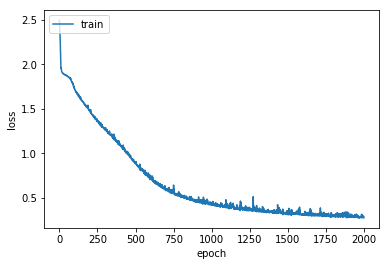

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [65]:
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 2ms/step
acc: 88.00%


In [66]:
# Maximum prediction count
pred_count = 50

In [68]:
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(X_train)

In [69]:
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one hot encoding to label
    seq_out.append(idx2code[idx]) # append code

In [70]:
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


## Full song prediction

In [71]:
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

In [72]:
for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)


full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'e8']
